感谢https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork

In [7]:
import numpy
import scipy  
# neural network class definition
class neuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(
            0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(
            0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)

        pass

    # train the neural network

    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (
            1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * \
            numpy.dot((hidden_errors * hidden_outputs *
                      (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass

    # query the neural network

    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

    # backquery the neural network
    # we'll use the same termnimology to each item,
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes

    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T

        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01

        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)

        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01

        return inputs

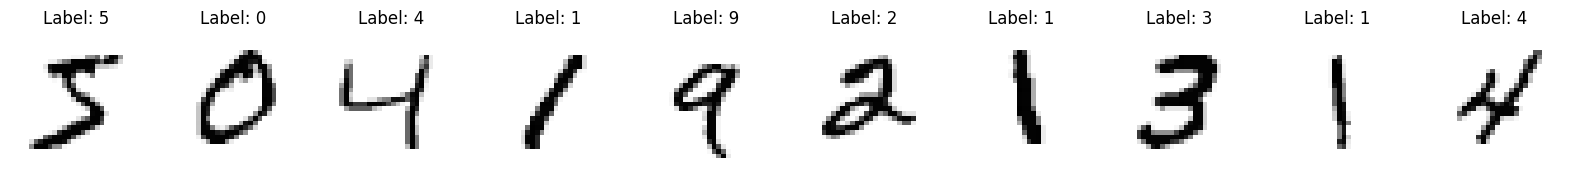

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def plot_first_ten_images(csv_file):
    # Load data from CSV
    data = np.loadtxt(csv_file, delimiter=',')

    # Plot the first ten images
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        img = data[i, 1:].reshape(28, 28)
        axes[i].imshow(img, cmap='Greys', interpolation='none')
        axes[i].set_title(f"Label: {int(data[i, 0])}")
        axes[i].axis('off')
    plt.show()


# Assuming the CSV file is named 'mnist_train.csv' and is located in the same folder as this script
# Replace with your CSV file path
csv_file = r'D:\Microsoft_VS_Code\vscode_Python\Workspace\RC2024培训\Xiamen_University_2024RCS_Training\mnist_dataset\mnist_train.csv'

# Uncomment the following line to plot the first ten images from the MNIST dataset in CSV format
plot_first_ten_images(csv_file)

# Note: This code cannot be executed here as I do not have access to the actual CSV file.
# Please run this code in your local environment where the 'mnist_train.csv' file is available.

In [9]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes,output_nodes, learning_rate)

In [10]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [11]:
# # train the neural network

# # epochs is the number of times the training data set is used for training
# epochs = 5

# for e in range(epochs):
#     # go through all records in the training data set
#     for record in training_data_list:
#         # split the record by the ',' commas
#         all_values = record.split(',')
#         # scale and shift the inputs
#         inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#         # create the target output values (all 0.01, except the desired label which is 0.99)
#         targets = numpy.zeros(output_nodes) + 0.01
#         # all_values[0] is the target label for this record
#         targets[int(all_values[0])] = 0.99
#         n.train(inputs, targets)
#         pass
#     pass

In [12]:
import numpy
from tqdm import tqdm

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # 使用 tqdm 包装 training_data_list 来添加进度条
    training_data_list = tqdm(training_data_list, desc=f"Epoch {e+1}/{epochs}")

    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

Epoch 5/5: 100%|██████████| 1345/1345 [00:01<00:00, 975.54it/s]


In [13]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [14]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

    pass

In [15]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9230769230769231


反向探究神经网络内部

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


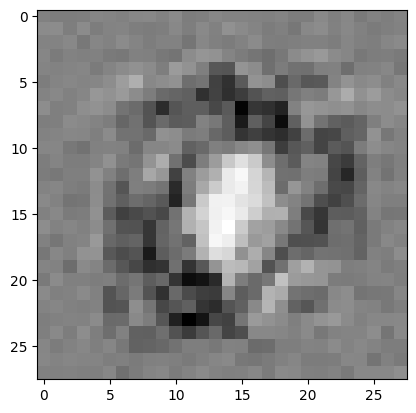

In [17]:
# run the network backwards, given a label, see what image it produces
import matplotlib
# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28, 28), cmap='Greys', interpolation='None')

数据增强

0.01
1.0
0.009999999999999998
0.9974879535602992


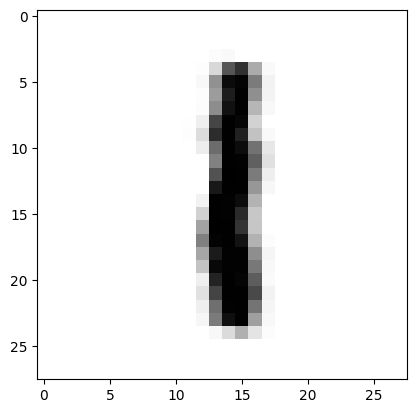

In [18]:
import numpy
import matplotlib.pyplot
%matplotlib inline
# scipy.ndimage for rotating image arrays
import scipy.ndimage

# open the CSV file and read its contents into a list
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

# %%
# which record will be use
record = 6

# %%
# scale input to range 0.01 to 1.00
all_values = data_list[record].split(',')
scaled_input = ((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01).reshape(28,28)

print(numpy.min(scaled_input))
print(numpy.max(scaled_input))

# plot the original image
matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

# create rotated variations
# rotated anticlockwise by 10 degrees
inputs_plus10_img = scipy.ndimage.rotate(scaled_input, 10.0, cval=0.01, order=1, reshape=False)
# rotated clockwise by 10 degrees
inputs_minus10_img = scipy.ndimage.rotate(scaled_input, -10.0, cval=0.01, order=1, reshape=False)

print(numpy.min(inputs_plus10_img))
print(numpy.max(inputs_plus10_img))

# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_plus10_img, cmap='Greys', interpolation='None')

# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_minus10_img, cmap='Greys', interpolation='None')



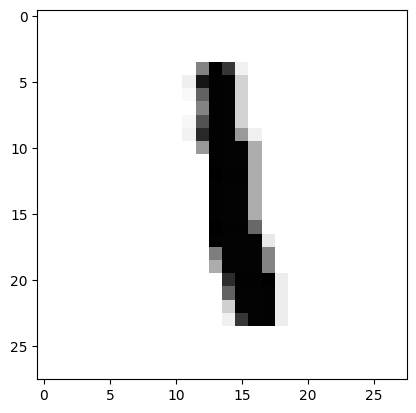

In [20]:
# plot the original image
matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

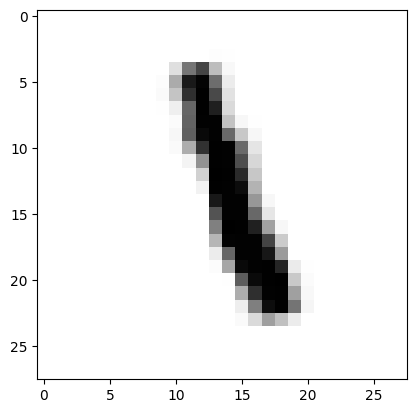

In [22]:
# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_plus10_img, cmap='Greys', interpolation='None')